## GOLD classification for COPD subjects followed by for COPD GENE BONE kernel subjects after curating paired kernel dataset

In [46]:
import pandas as pd 
import os 
import shutil
import matplotlib.pyplot as plt
import seaborn as sns  
import re

In [47]:
#Load the dataframes from the csv files 
copd_ge_initial = pd.read_csv("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/final_paired_data_spreadsheets/COPD_GE_pairedkernels_initial_sampling.csv")
copd_ge_additional = pd.read_csv("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/final_paired_data_spreadsheets/COPD_GE_pairedkernels_additional_sampling.csv")

#Merge the two dataframes 
copd_ge = pd.concat([copd_ge_initial, copd_ge_additional])
copd_ge = copd_ge.reset_index(drop=True)
copd_ge

,PatientID,StudyDate,Modality,BodyPart,Manufacturer,Spacing,NumSlice,NumDICOM,ScanLength,SeriesUID,ConvolutionKernel,SliceThickness,KVP,Reconstruction Diameter,Exposure Time,X-Ray Tube Current,Exposure,Spiral Pitch Factor
0,COPDGene_A16009,19000101,CT,NaN,GE MEDICAL SYSTEMS,0.625,522.0,522.0,326.250,1.2.840.113619.2.55.3.3852317604.741.128769737...,BONE,0.625,120.0,322.0,500,400,4,1.375
1,COPDGene_A16009,19000101,CT,NaN,GE MEDICAL SYSTEMS,0.625,507.0,507.0,316.875,1.2.840.113619.2.55.3.3852317604.741.128769737...,STANDARD,0.625,120.0,322.0,500,100,1,1.375
2,COPDGene_A24802,19000101,CT,NaN,GE MEDICAL SYSTEMS,0.625,584.0,584.0,365.000,1.2.840.113619.2.55.3.2831167752.727.122840803...,BONE,0.625,120.0,360.0,500,400,2,1.375
3,COPDGene_A24802,19000101,CT,NaN,GE MEDICAL SYSTEMS,0.625,489.0,489.0,305.625,1.2.840.113619.2.55.3.2831167752.727.122840803...,STANDARD,0.625,120.0,360.0,500,100,0,1.375
4,COPDGene_A43240,19000101,CT,NaN,GE MEDICAL SYSTEMS,0.625,469.0,469.0,293.125,1.2.840.113619.2.55.3.3852317604.390.127197598...,STANDARD,0.625,120.0,353.0,500,100,1,1.375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,COPDGene_P19505,19000101,CT,NaN,GE MEDICAL SYSTEMS,0.625,503.0,503.0,314.375,1.2.840.113619.2.55.1.1762927041.1897.12426487...,STANDARD,0.625,120.0,369.0,478,100,1189,NaN
264,COPDGene_Q59293,19000101,CT,NaN,GE MEDICAL SYSTEMS,0.625,432.0,432.0,270.000,1.2.840.113619.2.55.1.1762927041.1884.12235503...,BONE,0.625,120.0,405.0,478,400,4113,NaN
265,COPDGene_Q59293,19000101,CT,NaN,GE MEDICAL SYSTEMS,0.625,437.0,437.0,273.125,1.2.840.113619.2.55.1.1762927041.1884.12235503...,STANDARD,0.625,120.0,360.0,478,100,1039,NaN
266,COPDGene_Q70095,19000101,CT,NaN,GE MEDICAL SYSTEMS,0.625,470.0,470.0,293.750,1.2.840.113619.2.55.3.2831167752.127.127177625...,BONE,0.625,120.0,340.0,500,400,2,1.375


In [48]:
copd_ge = copd_ge.drop(columns = ["StudyDate", "Modality", "BodyPart"])
copd_ge

,PatientID,Manufacturer,Spacing,NumSlice,NumDICOM,ScanLength,SeriesUID,ConvolutionKernel,SliceThickness,KVP,Reconstruction Diameter,Exposure Time,X-Ray Tube Current,Exposure,Spiral Pitch Factor
0,COPDGene_A16009,GE MEDICAL SYSTEMS,0.625,522.0,522.0,326.250,1.2.840.113619.2.55.3.3852317604.741.128769737...,BONE,0.625,120.0,322.0,500,400,4,1.375
1,COPDGene_A16009,GE MEDICAL SYSTEMS,0.625,507.0,507.0,316.875,1.2.840.113619.2.55.3.3852317604.741.128769737...,STANDARD,0.625,120.0,322.0,500,100,1,1.375
2,COPDGene_A24802,GE MEDICAL SYSTEMS,0.625,584.0,584.0,365.000,1.2.840.113619.2.55.3.2831167752.727.122840803...,BONE,0.625,120.0,360.0,500,400,2,1.375
3,COPDGene_A24802,GE MEDICAL SYSTEMS,0.625,489.0,489.0,305.625,1.2.840.113619.2.55.3.2831167752.727.122840803...,STANDARD,0.625,120.0,360.0,500,100,0,1.375
4,COPDGene_A43240,GE MEDICAL SYSTEMS,0.625,469.0,469.0,293.125,1.2.840.113619.2.55.3.3852317604.390.127197598...,STANDARD,0.625,120.0,353.0,500,100,1,1.375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,COPDGene_P19505,GE MEDICAL SYSTEMS,0.625,503.0,503.0,314.375,1.2.840.113619.2.55.1.1762927041.1897.12426487...,STANDARD,0.625,120.0,369.0,478,100,1189,NaN
264,COPDGene_Q59293,GE MEDICAL SYSTEMS,0.625,432.0,432.0,270.000,1.2.840.113619.2.55.1.1762927041.1884.12235503...,BONE,0.625,120.0,405.0,478,400,4113,NaN
265,COPDGene_Q59293,GE MEDICAL SYSTEMS,0.625,437.0,437.0,273.125,1.2.840.113619.2.55.1.1762927041.1884.12235503...,STANDARD,0.625,120.0,360.0,478,100,1039,NaN
266,COPDGene_Q70095,GE MEDICAL SYSTEMS,0.625,470.0,470.0,293.750,1.2.840.113619.2.55.3.2831167752.127.127177625...,BONE,0.625,120.0,340.0,500,400,2,1.375


In [49]:
#Count the total number of slices for all the patients having BONE and STANDARD kernels
total_slices_bone = copd_ge[copd_ge['ConvolutionKernel'] == 'BONE']['NumSlice'].sum()
total_slices_standard = copd_ge[copd_ge['ConvolutionKernel'] == 'STANDARD']['NumSlice'].sum()

total_slices_bone, total_slices_standard

(67109.0, 64837.0)

In [50]:
#Split the datframe into two dataframes. Dataframe 1 will have 100 subjects with pairs of BONE and STANDARD kernel. Dataframe 2 will have the remaining subjects.
grouped_copd = copd_ge.groupby(['PatientID']).size().reset_index(name = 'Counts')

In [51]:
grouped_copd

,PatientID,Counts
0,COPDGene_A00282,2
1,COPDGene_A09543,2
2,COPDGene_A16009,2
3,COPDGene_A24802,2
4,COPDGene_A43240,2
...,...,...
129,COPDGene_Q15613,2
130,COPDGene_Q53485,2
131,COPDGene_Q53566,2
132,COPDGene_Q59293,2


In [52]:
#Random sample 100 subjects from the dataframe
copd_ge_100 = grouped_copd.sample(n=100, random_state=1)
copd_ge_100

,PatientID,Counts
42,COPDGene_F02607,2
36,COPDGene_D90444,2
93,COPDGene_M09479,2
5,COPDGene_A67397,2
65,COPDGene_H39589,2
...,...,...
109,COPDGene_N37247,2
88,COPDGene_L75615,2
8,COPDGene_B01752,2
81,COPDGene_L08729,2


In [53]:
#Get the remaining 34 subjects
remaining_subjects = grouped_copd.drop(copd_ge_100.index)
remaining_subjects


,PatientID,Counts
0,COPDGene_A00282,2
1,COPDGene_A09543,2
7,COPDGene_A90522,2
9,COPDGene_B02099,2
11,COPDGene_B11434,2
13,COPDGene_B25378,2
14,COPDGene_B26679,2
18,COPDGene_B68201,2
20,COPDGene_B87500,2
22,COPDGene_C03575,2


In [54]:
copd_remaining = copd_ge[copd_ge['PatientID'].isin(remaining_subjects['PatientID'])]
copd_remaining.to_csv("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/final_paired_data_spreadsheets/COPD_GE_pairedkernels_after100randomsamples.csv", index = False)
copd_remaining

,PatientID,Manufacturer,Spacing,NumSlice,NumDICOM,ScanLength,SeriesUID,ConvolutionKernel,SliceThickness,KVP,Reconstruction Diameter,Exposure Time,X-Ray Tube Current,Exposure,Spiral Pitch Factor
8,COPDGene_A90522,GE MEDICAL SYSTEMS,0.625,545.0,545.0,340.625,1.2.840.113619.2.181.33975605383.32020.1229954...,STANDARD,0.625,120.0,360.0,500,100,1,NaN
9,COPDGene_A90522,GE MEDICAL SYSTEMS,0.625,545.0,545.0,340.625,1.2.840.113619.2.181.33975605383.32020.1229954...,BONE,0.625,120.0,360.0,500,400,4,NaN
14,COPDGene_B11434,GE MEDICAL SYSTEMS,0.625,502.0,502.0,313.750,1.2.840.113619.2.55.3.2831167752.584.123972287...,BONE,0.625,120.0,360.0,500,400,2,1.375
15,COPDGene_B11434,GE MEDICAL SYSTEMS,0.625,485.0,485.0,303.125,1.2.840.113619.2.55.3.2831167752.584.123972287...,STANDARD,0.625,120.0,360.0,500,100,0,1.375
22,COPDGene_B68201,GE MEDICAL SYSTEMS,0.625,560.0,560.0,350.000,1.2.840.113619.2.55.3.2831167752.561.121570247...,BONE,0.625,120.0,360.0,500,400,2,1.375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,COPDGene_H00241,GE MEDICAL SYSTEMS,0.625,377.0,377.0,235.625,1.2.840.113619.2.25.1.1762927041.1274441843.126,BONE,0.625,120.0,457.0,478,400,3613,NaN
234,COPDGene_J37330,GE MEDICAL SYSTEMS,0.625,504.0,504.0,315.000,1.2.840.113619.2.55.3.279720240.745.1255532321...,STANDARD,0.625,120.0,360.0,500,100,1,1.375
235,COPDGene_J37330,GE MEDICAL SYSTEMS,0.625,504.0,504.0,315.000,1.2.840.113619.2.55.3.279720240.745.1255532320...,BONE,0.625,120.0,360.0,500,400,2,1.375
258,COPDGene_N78914,GE MEDICAL SYSTEMS,0.625,472.0,472.0,295.000,1.2.840.113619.2.25.4.477398.1233714827.65,BONE,0.625,120.0,360.0,478,400,9,1.375


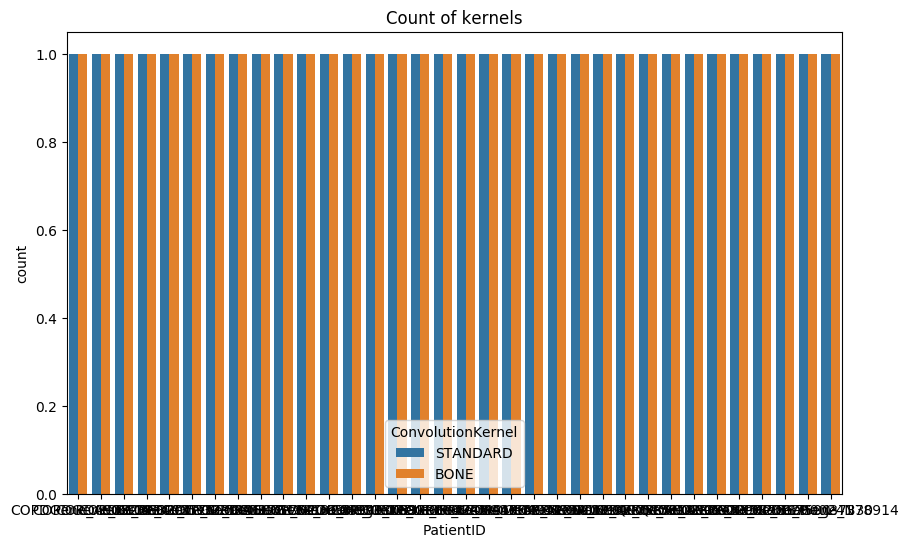

In [55]:
plt.figure(figsize=(10, 6))
sns.countplot(x = 'PatientID', data = copd_remaining, hue = "ConvolutionKernel")
plt.title("Count of kernels")
plt.show()

In [56]:
#Get the 100 subjects from copd_ge
copd_ge_100_sampled = copd_ge[copd_ge['PatientID'].isin(copd_ge_100['PatientID'])]
copd_ge_100_sampled.to_csv("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/final_paired_data_spreadsheets/COPD_GE_pairedkernels_100randomsamples.csv", index = False)
copd_ge_100_sampled

,PatientID,Manufacturer,Spacing,NumSlice,NumDICOM,ScanLength,SeriesUID,ConvolutionKernel,SliceThickness,KVP,Reconstruction Diameter,Exposure Time,X-Ray Tube Current,Exposure,Spiral Pitch Factor
0,COPDGene_A16009,GE MEDICAL SYSTEMS,0.625,522.0,522.0,326.250,1.2.840.113619.2.55.3.3852317604.741.128769737...,BONE,0.625,120.0,322.0,500,400,4,1.375
1,COPDGene_A16009,GE MEDICAL SYSTEMS,0.625,507.0,507.0,316.875,1.2.840.113619.2.55.3.3852317604.741.128769737...,STANDARD,0.625,120.0,322.0,500,100,1,1.375
2,COPDGene_A24802,GE MEDICAL SYSTEMS,0.625,584.0,584.0,365.000,1.2.840.113619.2.55.3.2831167752.727.122840803...,BONE,0.625,120.0,360.0,500,400,2,1.375
3,COPDGene_A24802,GE MEDICAL SYSTEMS,0.625,489.0,489.0,305.625,1.2.840.113619.2.55.3.2831167752.727.122840803...,STANDARD,0.625,120.0,360.0,500,100,0,1.375
4,COPDGene_A43240,GE MEDICAL SYSTEMS,0.625,469.0,469.0,293.125,1.2.840.113619.2.55.3.3852317604.390.127197598...,STANDARD,0.625,120.0,353.0,500,100,1,1.375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,COPDGene_P19505,GE MEDICAL SYSTEMS,0.625,503.0,503.0,314.375,1.2.840.113619.2.55.1.1762927041.1897.12426487...,STANDARD,0.625,120.0,369.0,478,100,1189,NaN
264,COPDGene_Q59293,GE MEDICAL SYSTEMS,0.625,432.0,432.0,270.000,1.2.840.113619.2.55.1.1762927041.1884.12235503...,BONE,0.625,120.0,405.0,478,400,4113,NaN
265,COPDGene_Q59293,GE MEDICAL SYSTEMS,0.625,437.0,437.0,273.125,1.2.840.113619.2.55.1.1762927041.1884.12235503...,STANDARD,0.625,120.0,360.0,478,100,1039,NaN
266,COPDGene_Q70095,GE MEDICAL SYSTEMS,0.625,470.0,470.0,293.750,1.2.840.113619.2.55.3.2831167752.127.127177625...,BONE,0.625,120.0,340.0,500,400,2,1.375


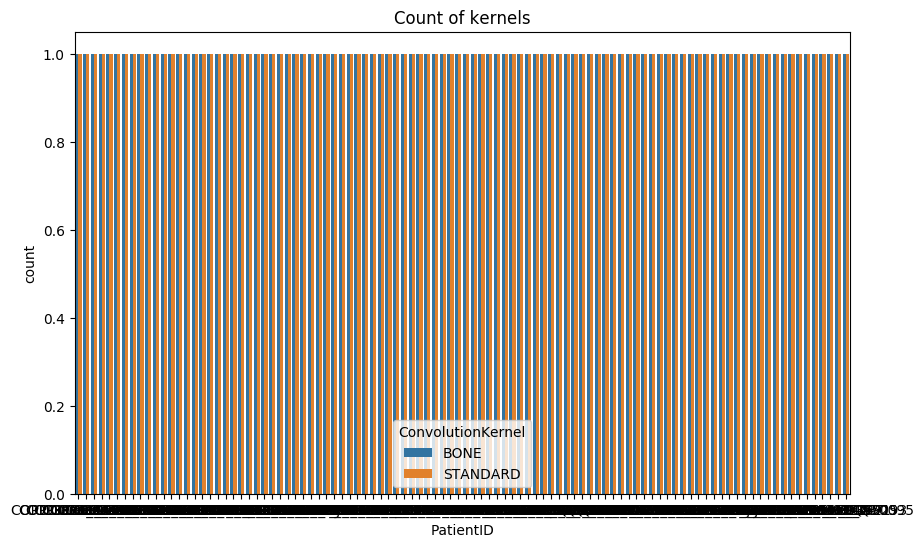

In [57]:
plt.figure(figsize=(10, 6))
sns.countplot(x = 'PatientID', data = copd_ge_100_sampled, hue = "ConvolutionKernel")
plt.title("Count of kernels")
plt.show()

In [58]:
#Count the total number of slices for all the patients having BONE and STANDARD kernels
total_slices_bone = copd_ge_100_sampled[copd_ge_100_sampled['ConvolutionKernel'] == 'BONE']['NumSlice'].sum()
total_slices_standard = copd_ge_100_sampled[copd_ge_100_sampled['ConvolutionKernel'] == 'STANDARD']['NumSlice'].sum()

total_slices_bone, total_slices_standard

(50094.0, 48581.0)

### GOLD Classification

In [59]:
gold_copd_ge = pd.read_csv("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/copdgene_goldcriteria_SPIE_data_GEkernels_paired_inspexpscans_ONLY.csv")
gold_copd_ge

,File_Path,PatientID,ConvolutionKernel,SeriesDescription,Manufacturer,Inspiration_Expiration
0,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_A00282,BONE,COPDGene_A00282_INSP_SHARP,GE MEDICAL SYSTEMS,INSP_SHARP
1,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_A00282,STANDARD,COPDGene_A00282_EXP_STD,GE MEDICAL SYSTEMS,EXP_STD
2,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_A05113,BONE,COPDGene_A05113_INSP_SHARP,GE MEDICAL SYSTEMS,INSP_SHARP
3,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_A05113,STANDARD,COPDGene_A05113_EXP_STD,GE MEDICAL SYSTEMS,EXP_STD
4,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_A08860,BONE,COPDGene_A08860_INSP_SHARP,GE MEDICAL SYSTEMS,INSP_SHARP
...,...,...,...,...,...,...
1505,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_Q70095,BONE,COPDGene_Q70095_INSP_SHARP,GE MEDICAL SYSTEMS,INSP_SHARP
1506,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_Q72811,STANDARD,COPDGene_Q72811_EXP_STD,GE MEDICAL SYSTEMS,EXP_STD
1507,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_Q72811,BONE,COPDGene_Q72811_INSP_SHARP,GE MEDICAL SYSTEMS,INSP_SHARP
1508,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_Q73716,BONE,COPDGene_Q73716_INSP_SHARP,GE MEDICAL SYSTEMS,INSP_SHARP


In [60]:
gold_copd = pd.read_csv("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/COPD_gene_COPDsubjects.csv")
gold_copd

,Body Site,Case/control,Consent code,Consent,Downloaded,File Name,Study PHS,GOLD classification,Image type,local_id,Population,Sex
0,chest,case,2,DS-CS,Yes,COPDGene_A00282,phs000179,GOLD_3,CT,d1992781,Caucasian,female
1,chest,case,2,DS-CS,Yes,COPDGene_A00282_COPDGene_A00282,phs000179,GOLD_3,CT,d1984662,Caucasian,female
2,chest,case,1,HMB,Yes,COPDGene_A04808,phs000179,GOLD_3,CT,d1990454,African,male
3,chest,case,1,HMB,Yes,COPDGene_A04808_COPDGene_A04808,phs000179,GOLD_3,CT,d1975491,African American,male
4,chest,case,1,HMB,Yes,COPDGene_A05032_COPDGene_A05032,phs000179,GOLD_2,CT,d1978067,Caucasian,male
...,...,...,...,...,...,...,...,...,...,...,...,...
2767,chest,case,1,HMB,Yes,COPDGene_Q75550_COPDGene_Q75550,phs000179,GOLD_3,CT,d1980079,Caucasian,female
2768,chest,case,1,HMB,Yes,COPDGene_Q75847_COPDGene_Q75847,phs000179,GOLD_2,CT,d1979186,Caucasian,female
2769,chest,case,1,HMB,Yes,COPDGene_Q77447_COPDGene_Q77447,phs000179,GOLD_2,CT,d1978508,Caucasian,male
2770,chest,case,1,HMB,Yes,COPDGene_Q77609_COPDGene_Q77609,phs000179,GOLD_2,CT,d1978509,Caucasian,male


In [61]:
copd_ge_100_sampled_grouped = copd_ge_100_sampled.groupby(['PatientID']).size().reset_index(name = 'Counts')
copd_ge_100_sampled_grouped

,PatientID,Counts
0,COPDGene_A16009,2
1,COPDGene_A24802,2
2,COPDGene_A43240,2
3,COPDGene_A67397,2
4,COPDGene_A85812,2
...,...,...
95,COPDGene_Q08973,2
96,COPDGene_Q53485,2
97,COPDGene_Q53566,2
98,COPDGene_Q59293,2


In [62]:
classification_copd = pd.merge(gold_copd_ge, copd_ge_100_sampled_grouped, on = 'PatientID', how = 'inner')
classification_copd

,File_Path,PatientID,ConvolutionKernel,SeriesDescription,Manufacturer,Inspiration_Expiration,Counts
0,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_A16009,BONE,COPDGene_A16009_INSP_SHARP,GE MEDICAL SYSTEMS,INSP_SHARP,2
1,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_A16009,STANDARD,COPDGene_A16009_EXP_STD,GE MEDICAL SYSTEMS,EXP_STD,2
2,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_A24802,STANDARD,COPDGene_A24802_EXP_STD,GE MEDICAL SYSTEMS,EXP_STD,2
3,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_A24802,BONE,COPDGene_A24802_INSP_SHARP,GE MEDICAL SYSTEMS,INSP_SHARP,2
4,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_A43240,STANDARD,COPDGene_A43240_EXP_STD,GE MEDICAL SYSTEMS,EXP_STD,2
...,...,...,...,...,...,...,...
195,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_Q53566,STANDARD,COPDGene_Q53566_EXP_STD,GE MEDICAL SYSTEMS,EXP_STD,2
196,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_Q59293,BONE,COPDGene_Q59293_INSP_SHARP,GE MEDICAL SYSTEMS,INSP_SHARP,2
197,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_Q59293,STANDARD,COPDGene_Q59293_EXP_STD,GE MEDICAL SYSTEMS,EXP_STD,2
198,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_Q70095,STANDARD,COPDGene_Q70095_EXP_STD,GE MEDICAL SYSTEMS,EXP_STD,2


In [63]:
gold_copd

,Body Site,Case/control,Consent code,Consent,Downloaded,File Name,Study PHS,GOLD classification,Image type,local_id,Population,Sex
0,chest,case,2,DS-CS,Yes,COPDGene_A00282,phs000179,GOLD_3,CT,d1992781,Caucasian,female
1,chest,case,2,DS-CS,Yes,COPDGene_A00282_COPDGene_A00282,phs000179,GOLD_3,CT,d1984662,Caucasian,female
2,chest,case,1,HMB,Yes,COPDGene_A04808,phs000179,GOLD_3,CT,d1990454,African,male
3,chest,case,1,HMB,Yes,COPDGene_A04808_COPDGene_A04808,phs000179,GOLD_3,CT,d1975491,African American,male
4,chest,case,1,HMB,Yes,COPDGene_A05032_COPDGene_A05032,phs000179,GOLD_2,CT,d1978067,Caucasian,male
...,...,...,...,...,...,...,...,...,...,...,...,...
2767,chest,case,1,HMB,Yes,COPDGene_Q75550_COPDGene_Q75550,phs000179,GOLD_3,CT,d1980079,Caucasian,female
2768,chest,case,1,HMB,Yes,COPDGene_Q75847_COPDGene_Q75847,phs000179,GOLD_2,CT,d1979186,Caucasian,female
2769,chest,case,1,HMB,Yes,COPDGene_Q77447_COPDGene_Q77447,phs000179,GOLD_2,CT,d1978508,Caucasian,male
2770,chest,case,1,HMB,Yes,COPDGene_Q77609_COPDGene_Q77609,phs000179,GOLD_2,CT,d1978509,Caucasian,male


In [64]:
# Assuming 'df' is your DataFrame and 'File Name' is the column with the file names
gold_copd['File Name'] = gold_copd['File Name'].apply(lambda x: x.split('_')[0] + '_' + x.split('_')[1] if len(x.split('_')) > 2 else x)
gold_copd

,Body Site,Case/control,Consent code,Consent,Downloaded,File Name,Study PHS,GOLD classification,Image type,local_id,Population,Sex
0,chest,case,2,DS-CS,Yes,COPDGene_A00282,phs000179,GOLD_3,CT,d1992781,Caucasian,female
1,chest,case,2,DS-CS,Yes,COPDGene_A00282,phs000179,GOLD_3,CT,d1984662,Caucasian,female
2,chest,case,1,HMB,Yes,COPDGene_A04808,phs000179,GOLD_3,CT,d1990454,African,male
3,chest,case,1,HMB,Yes,COPDGene_A04808,phs000179,GOLD_3,CT,d1975491,African American,male
4,chest,case,1,HMB,Yes,COPDGene_A05032,phs000179,GOLD_2,CT,d1978067,Caucasian,male
...,...,...,...,...,...,...,...,...,...,...,...,...
2767,chest,case,1,HMB,Yes,COPDGene_Q75550,phs000179,GOLD_3,CT,d1980079,Caucasian,female
2768,chest,case,1,HMB,Yes,COPDGene_Q75847,phs000179,GOLD_2,CT,d1979186,Caucasian,female
2769,chest,case,1,HMB,Yes,COPDGene_Q77447,phs000179,GOLD_2,CT,d1978508,Caucasian,male
2770,chest,case,1,HMB,Yes,COPDGene_Q77609,phs000179,GOLD_2,CT,d1978509,Caucasian,male


In [65]:
#If the patient is in gold_copd and the patients is in classification COPD, talee the classification from gold_copd and append as a new column in classification_copd
gold_copd = gold_copd.rename(columns = {'File Name': 'PatientID'})
classification_copd_new = pd.merge(classification_copd, gold_copd, on = 'PatientID', how = 'inner')
classification_copd_new

,File_Path,PatientID,ConvolutionKernel,SeriesDescription,Manufacturer,Inspiration_Expiration,Counts,Body Site,Case/control,Consent code,Consent,Downloaded,Study PHS,GOLD classification,Image type,local_id,Population,Sex
0,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_A16009,BONE,COPDGene_A16009_INSP_SHARP,GE MEDICAL SYSTEMS,INSP_SHARP,2,chest,case,1,HMB,Yes,phs000179,GOLD_2,CT,d1978801,Caucasian,female
1,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_A16009,STANDARD,COPDGene_A16009_EXP_STD,GE MEDICAL SYSTEMS,EXP_STD,2,chest,case,1,HMB,Yes,phs000179,GOLD_2,CT,d1978801,Caucasian,female
2,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_A24802,STANDARD,COPDGene_A24802_EXP_STD,GE MEDICAL SYSTEMS,EXP_STD,2,chest,case,1,HMB,Yes,phs000179,GOLD_4,CT,d1991634,Caucasian,male
3,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_A24802,STANDARD,COPDGene_A24802_EXP_STD,GE MEDICAL SYSTEMS,EXP_STD,2,chest,case,1,HMB,Yes,phs000179,GOLD_4,CT,d1980195,Caucasian,male
4,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_A24802,BONE,COPDGene_A24802_INSP_SHARP,GE MEDICAL SYSTEMS,INSP_SHARP,2,chest,case,1,HMB,Yes,phs000179,GOLD_4,CT,d1991634,Caucasian,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_Q59293,BONE,COPDGene_Q59293_INSP_SHARP,GE MEDICAL SYSTEMS,INSP_SHARP,2,chest,case,1,HMB,Yes,phs000179,GOLD_2,CT,d1975420,African American,female
244,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_Q59293,STANDARD,COPDGene_Q59293_EXP_STD,GE MEDICAL SYSTEMS,EXP_STD,2,chest,case,1,HMB,Yes,phs000179,GOLD_2,CT,d1990430,African,female
245,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_Q59293,STANDARD,COPDGene_Q59293_EXP_STD,GE MEDICAL SYSTEMS,EXP_STD,2,chest,case,1,HMB,Yes,phs000179,GOLD_2,CT,d1975420,African American,female
246,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_Q70095,STANDARD,COPDGene_Q70095_EXP_STD,GE MEDICAL SYSTEMS,EXP_STD,2,chest,case,1,HMB,Yes,phs000179,GOLD_3,CT,d1980077,Caucasian,female


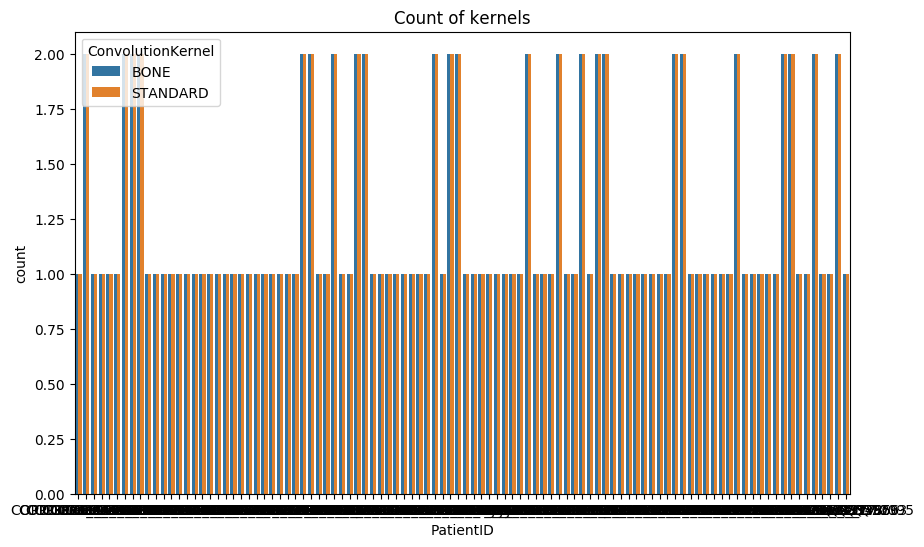

In [66]:
plt.figure(figsize=(10, 6))
sns.countplot(x = 'PatientID', data = classification_copd_new, hue = "ConvolutionKernel")
plt.title("Count of kernels")
plt.show()

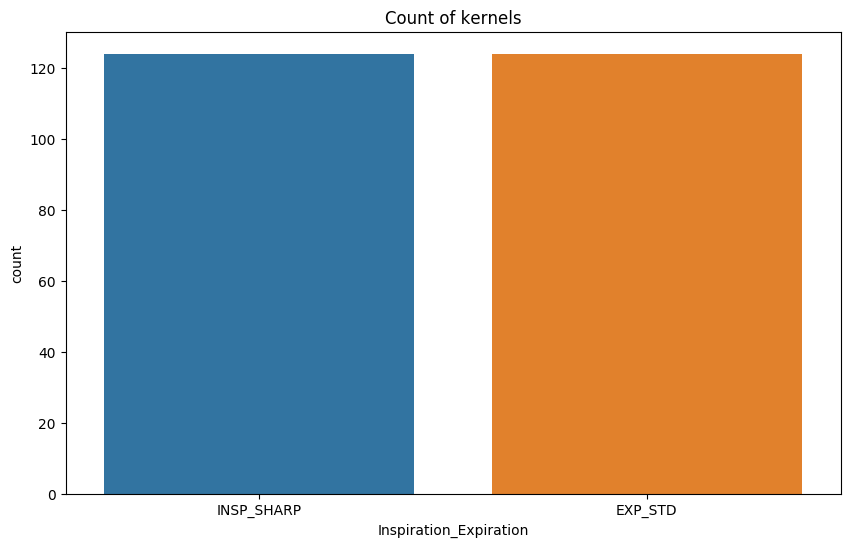

In [67]:
plt.figure(figsize=(10, 6))
sns.countplot(x = 'Inspiration_Expiration', data = classification_copd_new)
plt.title("Count of kernels")
plt.show()

In [68]:
#Remove the additional scans not present in classification_copd
classification_copd_new = classification_copd_new[classification_copd_new['PatientID'].isin(classification_copd['PatientID'])]
classification_copd_new

,File_Path,PatientID,ConvolutionKernel,SeriesDescription,Manufacturer,Inspiration_Expiration,Counts,Body Site,Case/control,Consent code,Consent,Downloaded,Study PHS,GOLD classification,Image type,local_id,Population,Sex
0,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_A16009,BONE,COPDGene_A16009_INSP_SHARP,GE MEDICAL SYSTEMS,INSP_SHARP,2,chest,case,1,HMB,Yes,phs000179,GOLD_2,CT,d1978801,Caucasian,female
1,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_A16009,STANDARD,COPDGene_A16009_EXP_STD,GE MEDICAL SYSTEMS,EXP_STD,2,chest,case,1,HMB,Yes,phs000179,GOLD_2,CT,d1978801,Caucasian,female
2,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_A24802,STANDARD,COPDGene_A24802_EXP_STD,GE MEDICAL SYSTEMS,EXP_STD,2,chest,case,1,HMB,Yes,phs000179,GOLD_4,CT,d1991634,Caucasian,male
3,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_A24802,STANDARD,COPDGene_A24802_EXP_STD,GE MEDICAL SYSTEMS,EXP_STD,2,chest,case,1,HMB,Yes,phs000179,GOLD_4,CT,d1980195,Caucasian,male
4,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_A24802,BONE,COPDGene_A24802_INSP_SHARP,GE MEDICAL SYSTEMS,INSP_SHARP,2,chest,case,1,HMB,Yes,phs000179,GOLD_4,CT,d1991634,Caucasian,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_Q59293,BONE,COPDGene_Q59293_INSP_SHARP,GE MEDICAL SYSTEMS,INSP_SHARP,2,chest,case,1,HMB,Yes,phs000179,GOLD_2,CT,d1975420,African American,female
244,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_Q59293,STANDARD,COPDGene_Q59293_EXP_STD,GE MEDICAL SYSTEMS,EXP_STD,2,chest,case,1,HMB,Yes,phs000179,GOLD_2,CT,d1990430,African,female
245,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_Q59293,STANDARD,COPDGene_Q59293_EXP_STD,GE MEDICAL SYSTEMS,EXP_STD,2,chest,case,1,HMB,Yes,phs000179,GOLD_2,CT,d1975420,African American,female
246,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_Q70095,STANDARD,COPDGene_Q70095_EXP_STD,GE MEDICAL SYSTEMS,EXP_STD,2,chest,case,1,HMB,Yes,phs000179,GOLD_3,CT,d1980077,Caucasian,female


In [72]:
classification_copd_new.drop(columns = ["File_Path", "Counts", "Downloaded"], inplace = True)
classification_copd_new

,PatientID,ConvolutionKernel,SeriesDescription,Manufacturer,Inspiration_Expiration,Body Site,Case/control,Consent code,Consent,Study PHS,GOLD classification,Image type,local_id,Population,Sex
0,COPDGene_A16009,BONE,COPDGene_A16009_INSP_SHARP,GE MEDICAL SYSTEMS,INSP_SHARP,chest,case,1,HMB,phs000179,GOLD_2,CT,d1978801,Caucasian,female
1,COPDGene_A16009,STANDARD,COPDGene_A16009_EXP_STD,GE MEDICAL SYSTEMS,EXP_STD,chest,case,1,HMB,phs000179,GOLD_2,CT,d1978801,Caucasian,female
2,COPDGene_A24802,STANDARD,COPDGene_A24802_EXP_STD,GE MEDICAL SYSTEMS,EXP_STD,chest,case,1,HMB,phs000179,GOLD_4,CT,d1991634,Caucasian,male
3,COPDGene_A24802,STANDARD,COPDGene_A24802_EXP_STD,GE MEDICAL SYSTEMS,EXP_STD,chest,case,1,HMB,phs000179,GOLD_4,CT,d1980195,Caucasian,male
4,COPDGene_A24802,BONE,COPDGene_A24802_INSP_SHARP,GE MEDICAL SYSTEMS,INSP_SHARP,chest,case,1,HMB,phs000179,GOLD_4,CT,d1991634,Caucasian,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,COPDGene_Q59293,BONE,COPDGene_Q59293_INSP_SHARP,GE MEDICAL SYSTEMS,INSP_SHARP,chest,case,1,HMB,phs000179,GOLD_2,CT,d1975420,African American,female
244,COPDGene_Q59293,STANDARD,COPDGene_Q59293_EXP_STD,GE MEDICAL SYSTEMS,EXP_STD,chest,case,1,HMB,phs000179,GOLD_2,CT,d1990430,African,female
245,COPDGene_Q59293,STANDARD,COPDGene_Q59293_EXP_STD,GE MEDICAL SYSTEMS,EXP_STD,chest,case,1,HMB,phs000179,GOLD_2,CT,d1975420,African American,female
246,COPDGene_Q70095,STANDARD,COPDGene_Q70095_EXP_STD,GE MEDICAL SYSTEMS,EXP_STD,chest,case,1,HMB,phs000179,GOLD_3,CT,d1980077,Caucasian,female


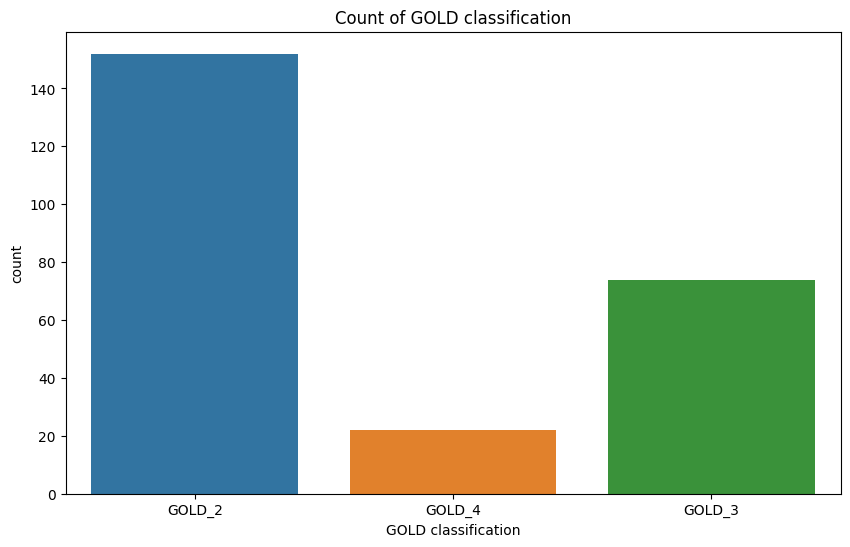

In [75]:
##24 subjects have more than 2 kernels but I do not think thats a problme 
plt.figure(figsize=(10, 6))
sns.countplot(x = 'GOLD classification', data = classification_copd_new)
plt.title("Count of GOLD classification")
plt.show()

In [74]:
classification_copd_new.to_csv("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/final_paired_data_spreadsheets/COPD_GE_pairedkernels_100randomsamples_GOLDlabels.csv", index = False)

## Cases data split 

In [ ]:
sample_100 = pd.read_csv("")